# Jupyter Notebooks

## Intro to the python scientific stack 

Welcome to the Jupyter notebook, a place where you can combine markdown text, LaTeX equations, code and results in a single document. 

In this notebook we will introduce useful python libraries that are important if you want to do scientific computing. We will learn:

* How to import data, manipulate arrays and do operations with them using [Numpy](http://www.numpy.org/).

* How to do some stats and data fitting using **Numpy** and **Scipy**.

* How to do nice plots using [matplotlib](http://matplotlib.org/).

## Context — Earth temperature over time

Is global temperature rising? How much? This is a question of burning importance in today's world!

Data about global temperatures are available from several sources: NASA, the National Climatic Data Center (NCDC) and the University of East Anglia in the UK. Check out the [University Corporation for Atmospheric Research](https://www2.ucar.edu/climate/faq/how-much-has-global-temperature-risen-last-100-years) (UCAR) for an in-depth discussion.

The [NASA Goddard Space Flight Center](http://svs.gsfc.nasa.gov/goto?3901) is one of our sources of global climate data. They produced this video showing a color map of the changing global surface **temperature anomalies** from 1880 to 2011.

The term [global temperature anomaly](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php) means the difference in temperature with respect to a reference value or a long-term average. It is a very useful way of looking at the problem and in many ways better than absolute temperature. For example, a winter month may be colder than average in Washington DC, and also in Miami, but the absolute temperatures will be different in both places.

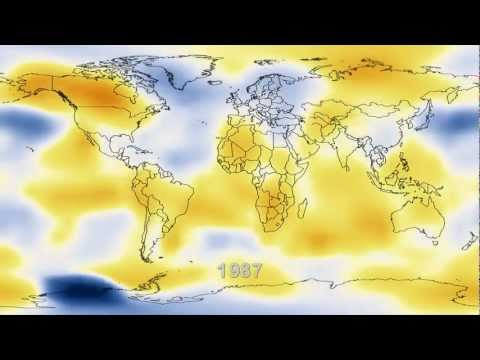

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('lyb4gau3LyI')

How would we go about understanding the _trends_ from the data on global temperature?

The first step in analyzing unknown data is to generate some simple plots using **matplotlib**. We are going to look at the temperature-anomaly history, contained in a file, and make our first plot to explore this data. 

We are going to smooth the data and then we'll fit a line to it to find a trend, plotting along the way to see how it all looks.

Let's get started!

## Step 1: Read a data file.

We took the data from the [NOAA](https://www.ncdc.noaa.gov/cag/) (National Oceanic and Atmospheric Administration) webpage. Feel free to play around with the webpage and analyze data on your own, but for now, let's make sure we're working with the same dataset.

First we will download the data from the web by using some Python magic and invoke the command `wget`.  We will save the file in the folder `resources` under the name:

`land_global_temperature_anomaly-1880-2015.csv`

This file contains the year and month on the first column and 12 monthly averages of land temperature anomaly listed sequentially on the second column, from 1880 to 2015. We will read the file, then make an initial plot to see what it looks like.


In the NOAA web page you can select the data that you want to download as  a `csv` file and this will automatically open another tab with the data. We want to get that data so we will use `wget` but instead from a terminal we will invoke it from the notebook, yes! from the notebook.

To run shell commands in the notebook we just need to use an exclamation mark `!` before the command:


In [2]:
!wget -O land_global_temperature_anomaly-1880-2015.csv  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv 

--2017-01-16 15:20:09--  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv
Resolving www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.171, 205.167.25.172, 2610:20:8040:2::171, ...
Connecting to www.ncdc.noaa.gov (www.ncdc.noaa.gov)|205.167.25.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘land_global_temperature_anomaly-1880-2015.csv’

    [ <=>                                   ] 23.796      --.-K/s   in 0,1s    

2017-01-16 15:20:11 (161 KB/s) - ‘land_global_temperature_anomaly-1880-2015.csv’ saved [23796]



We got the data! Now we need to load it so we can work with it. The first thing to do is to load our favorite library: the **NumPy** library for array operations.

In [3]:
import numpy

Pretty easy, right? Now to load the file, we use a function from the NumPy library called `loadtxt()`. To tell Python where to look for this function, we precede the function name with the library name, and use a dot between the two names. You can read the documentation in this [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html).

`loadtxt` expects every row in the same format, so we need to check that that's true of this data file. 
We could open it in Python, but we've already learned a useful command for peeking into files, right? 
Let's use `head` to show the first ten lines of the `csv` file, again using a `!` to denote a shell command.

In [4]:
!head land_global_temperature_anomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


We see that the first 4 lines of the file are metadata but those will mess up `loadtxt`. 
To fix this, we will pass an argument to `loadtxt` to tell it to skip the first 4 rows.

In [5]:
numpy.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv',
              delimiter=',', skiprows=4)

array([[  1.88001000e+05,  -1.53800000e-01],
       [  1.88002000e+05,  -5.77100000e-01],
       [  1.88003000e+05,  -7.25000000e-01],
       ..., 
       [  2.01510000e+05,   1.32120000e+00],
       [  2.01511000e+05,   1.28280000e+00],
       [  2.01512000e+05,   1.87220000e+00]])

We called the function with three parameters: the file name and path, the delimiter that separates each value on a line (a comma in this case), and `skiprows=4` which tells Numpy to omit the first 4 rows. 
Note that the first two parameters are strings (made up of characters) and we put them in quotes.

As the output of the function, we get an array. Because it's rather big, Python shows only a few rows and columns of the array. 

So far, so good. Now, what if we want to manipulate this data? Or plot it? We need to refer to it with a name. We've only just read the file, but we did not assign the array any name! Let's try again.

In [6]:
T_land = numpy.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv', 
                       delimiter=',', skiprows=4)

That's interesting. Now, we don't see any output from the function call. Why? It's simply that the output was stored into the variable `T_land`, so to see it, we can do:

In [7]:
print(T_land)

[[  1.88001000e+05  -1.53800000e-01]
 [  1.88002000e+05  -5.77100000e-01]
 [  1.88003000e+05  -7.25000000e-01]
 ..., 
 [  2.01510000e+05   1.32120000e+00]
 [  2.01511000e+05   1.28280000e+00]
 [  2.01512000e+05   1.87220000e+00]]


Ah, there it is! Let's find out how big the array is. For that, we use a cool NumPy function called `shape()`:

In [8]:
numpy.shape(T_land)

(1632, 2)

Again, we've told Python where to find the function `shape()` by attaching it to the library name with a dot. However, NumPy arrays also happen to have a property shape that will return the same value, so we can get the same result another way:

In [9]:
T_land.shape

(1632, 2)

It's just shorter. The array `T_shape` holding our temperature-anomaly data has two columns and 1632 rows. Since we said we had monthly data, how many years is that?

In [10]:
1632/12

136.0

That's right: from 1880 through 2015.

## Step 2: Plot the data.

We will display the data in two ways: as a time series of the monthly temperature anomalies versus time, and as a histogram. To be fancy, we'll put both plots in one figure.

Let's first load our plotting library, called `matplotlib`. To get the plots inside the notebook (rather than as popups), we use a special "magic" command, `%matplotlib inline`:

In [11]:
from matplotlib import pyplot
%matplotlib inline

What's this `from` business about?  `matplotlib` is a pretty big (and awesome!) library.  All that we need is a subset of the library for creating 2D plots, so we ask for the `pyplot` module of the `matplotlib` library.  

Plotting the time series of temperature is as easy as calling the function [`plot()`](http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.plot) from the module `pyplot`.  

But remember the shape of `T_land`? It has two columns and the temperature-anomaly values are in the second column. We extract the values of the second column by specifying 1 as the second index (the first column has index 0) and using the colon notation `:` to mean *all rows*. Check it out: 

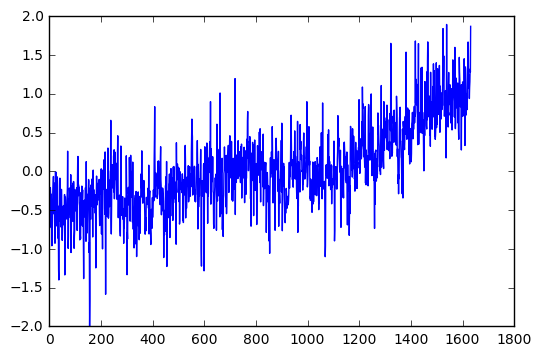

In [12]:
pyplot.plot(T_land[:,1])

You can add a semicolon at the end of the plotting command to avoid that stuff that appeared on top of the figure, that `Out[x]: [< ...>]` ugliness. Try it.

*Do you see a trend in the data?*

The plot above is certainly useful, but wouldn't it be nicer if we could look at the data relative to the year, instead of the location of the data in the array?

The plot function can take another input; let's get the year displayed as well.

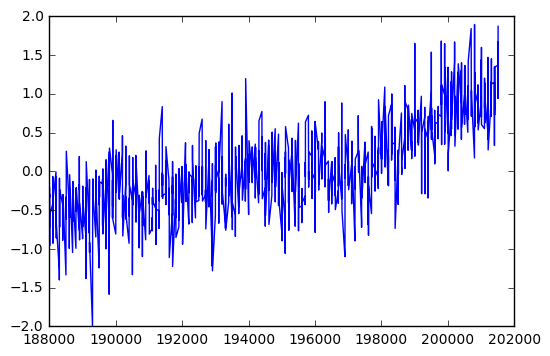

In [13]:
pyplot.plot(T_land[:,0],T_land[:,1]);

What happened? It does not look like the previous plot. 
It looks a little sparse. 
Do you know why? 
Notice that in the `csv` file the column for the years are integers, and even though we understand what they mean, is that what we want to plot? 
Let's take a closer look by just plotting the first two years. 

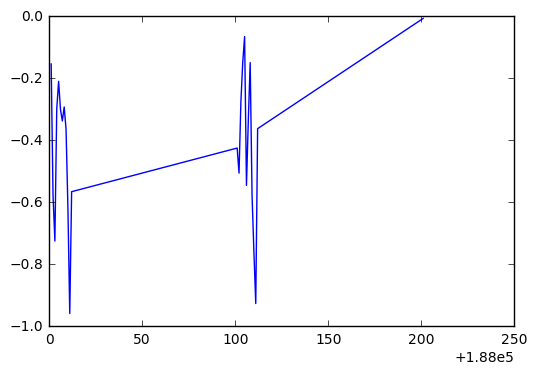

In [14]:
pyplot.plot(T_land[0:25,0],T_land[0:25,1]);

Do you notice what is going on? We are not using the right scale to plot our dates. However, **Python** is really cool and we can solve this in a nice and neat way. We will use [`numpy.arange()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) and specify a data type for dates that you can explore in depth in this [link](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html). 

In [15]:
date = numpy.arange('1880', '2016', dtype=('datetime64[M]'))

We passed to `numpy.arange()` three arguments, the beginning and the end of the array, and  `dtype=datetime64[M]` that indicates that we want to show every month in the range determined by the beginning and end of the array. Let's print some of the elements of the array `date`: 

In [16]:
print(date[0:15])

['1880-01' '1880-02' '1880-03' '1880-04' '1880-05' '1880-06' '1880-07'
 '1880-08' '1880-09' '1880-10' '1880-11' '1880-12' '1881-01' '1881-02'
 '1881-03']


We create this array but we can not use it directly to plot, we need a dummy array the same length as our data array. Then we will use the `date` array to plot the ticks on the `x-axis`.

In [17]:
len(T_land)

1632

The `dummy` array should contain 1632 equally space elements but it doesn't matter when it starts and when it finishes.
Why? Because we aren't going to use that for display!
For simplity we will start at 1 and finish at 1632. 
We will use [`numpy.linspace()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create our array. The first argument indicates the start of the array, the second the end, and the third one indicates the number of elements we want our array to have.

In [18]:
dummy = numpy.linspace(1, 1632, 1632)

We will use this array and the `date` array to make the plot again but now in the `x-axis` we will plot the `date`. Because plotting all the months will end up being non-readable, we will use **slices** to plot the `x-ticks` every ten years (120 months).    

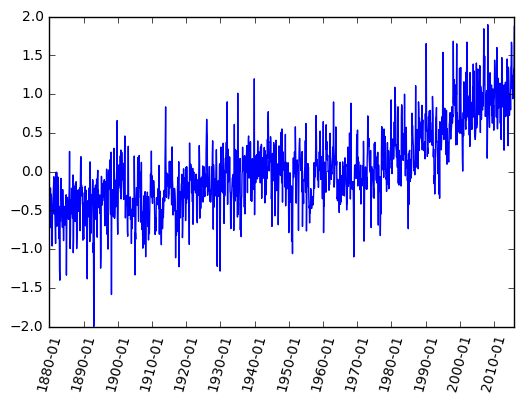

In [19]:
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)
pyplot.plot(dummy,T_land[:,1]);

Now we have a better plot but if I give you this plot without any information you would not be able to figure out what kind of data it is! We need labels on the axis, a title and why not a better color, font and size of the ticks. 
**Publication quality** plots should always be your standard for plotting. 
How you present your data will allow others (and probably you in the future) to better understand your work. 

Let's make the font of a specific size and type. 
We don't want to write this out every time we create a plot. 
Instead, the next few lines of code will apply for all the plots we create from now on.

In [20]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

We are going to plot the same plot as before but now we will add a few things to make it prettier and **publication quality**.

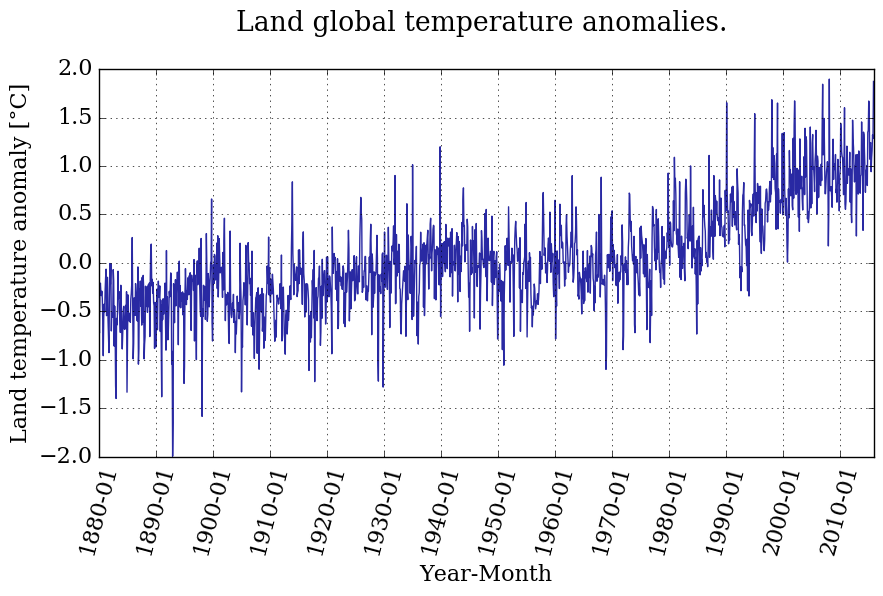

In [21]:
pyplot.figure(figsize=(10,5))
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)
pyplot.plot(dummy,T_land[:,1], color='#2929a3', linestyle='-', linewidth=1)
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

Better ah? Feel free to play around with the parameters and see how it changes. 

*Do you see a trend in the data?*

The temperature anomaly certainly seems to show an increasing trend. But we're not going to stop there, of course. It's not that easy to convince people that the planet is warming, as you know.

Plotting a histogram is as easy as calling the function `hist()`. Why should it be any harder?

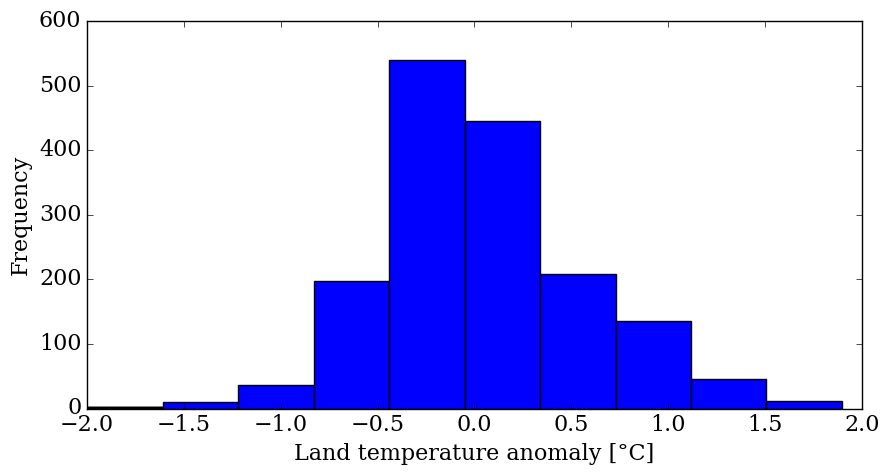

In [22]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1])
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Frequency');

You can control several parameters of the [`hist()`](http://matplotlib.org/1.3.1/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist) plot. Learn more by reading the manual page (yes, you have to read the manual sometimes!). The first option is the number of bins—the default is 10—but you can also change the appearance (color, transparency). Try some things out.

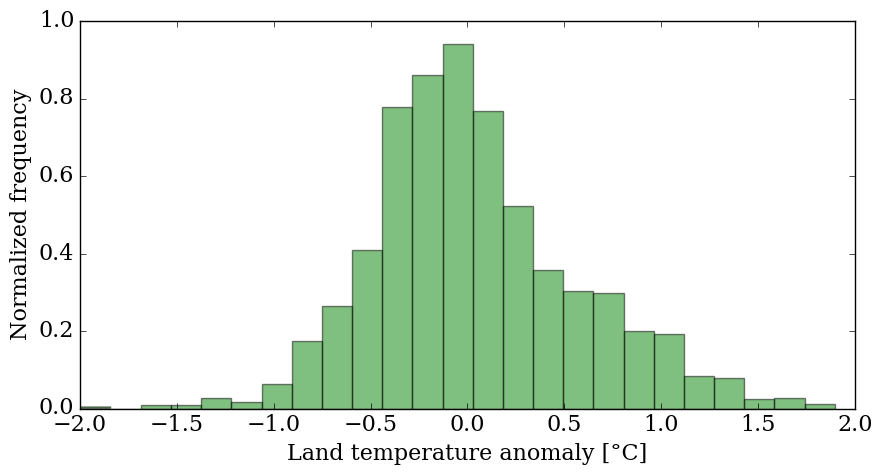

In [23]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], 25, normed=True, color='g', alpha=0.5)
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency');

What does this plot tell you about the data? It's more interesting than just an increasing trend, that's for sure. You might want to look at more statistics now: mean, median, standard deviation ... NumPy makes that easy for you:

In [24]:
mean_T = numpy.mean(T_land[:,1])
median_T = numpy.median(T_land[:,1])

print('The mean value is {:.5} and the median {:.5}'.format(mean_T,
                                                            median_T))

The mean value is 0.04031 and the median -0.0276


In [25]:
variance_T = numpy.var(T_land[:,1])
sigma_T = numpy.sqrt(variance_T)
print('The variance is {:.5} and the standard deviation {:.5}'.format(variance_T,
                                                                      sigma_T))

The variance is 0.28041 and the standard deviation 0.52954


With these data, we can plot the probability density function (pdf) that correspond to this data, compare with the histogram and see how far from a normal distribution we are.

In order to do that, we need to import the module [`stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) from **SciPy**, another great python library that contains tools for scientific computing. 

In [26]:
from scipy import stats

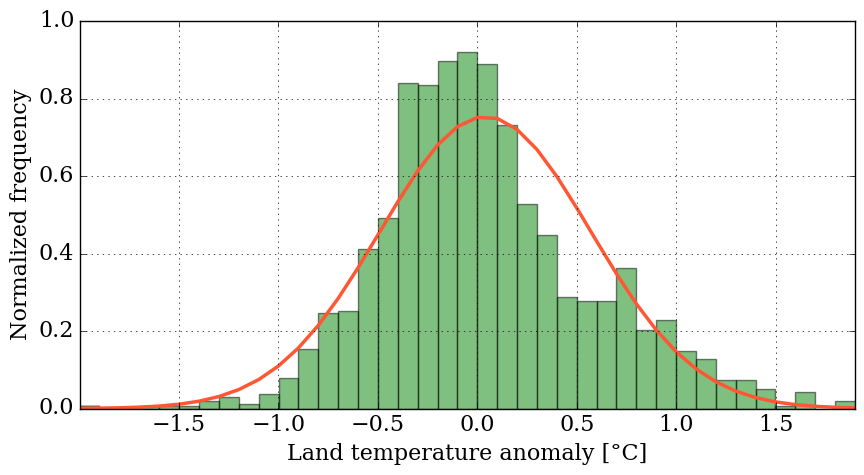

In [27]:
bins = numpy.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)

pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins, normed=True, facecolor='g', alpha=0.5)
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T),
            color='#ff5733', ls='-', lw=2.5)
pyplot.xlim(min(T_land[:,1]), max(T_land[:,1]))
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency')
pyplot.grid();

This is fun. Finally, we'll put both plots on the same figure using the [`subplot()`](http://matplotlib.org/api/pyplot_api.html?highlight=subplot#matplotlib.pyplot.subplot) function, which creates a grid of plots. The argument tells this function how many rows and columns of sub-plots we want, and where in the grid each plot will go.


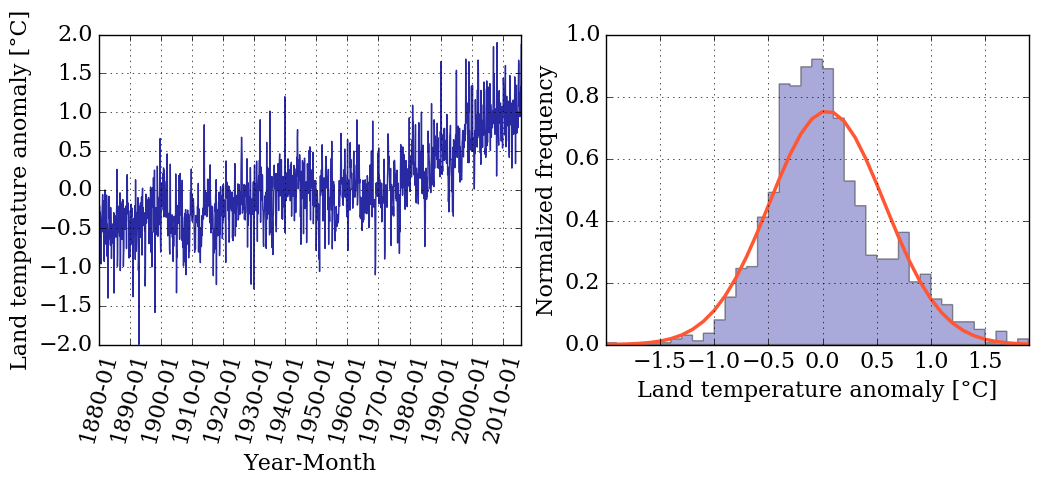

In [28]:
pyplot.figure(figsize=(12,4))  

pyplot.subplot(121)   # creates a grid of 1 row, 2 columns and 
                      # selects the first plot

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy,T_land[:,1], color='#2929a3', linestyle='-', linewidth=1) 
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid()

pyplot.subplot(122)            # prepares for the second plot

bins = numpy.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)
pyplot.hist(T_land[:,1], bins, normed=True, color='#2929a3',
            alpha=0.4, histtype= 'stepfilled')
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T),
            color='#ff5733', linestyle='-', linewidth=2.5)
pyplot.xlim(min(T_land[:,1]), max(T_land[:,1]))
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency')
pyplot.grid();

Did you notice that the histogram looks a little different? You can tweak the type of histogram you want to plot by passing the `histtype` argument to the `hist()` function. Curious about what other options do you have? Go back to the [documentation](http://matplotlib.org/1.3.1/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist) and read about the other options that you have. 

## Step 3: Smooth the data and do regression

You see a lot of fluctuations on the time series, so you might be asking yourself "How can I smooth it out?" No? Let's do it anyway.

One possible approach to smooth the data (there are others) is using a *moving average*, also known as a sliding-window average. This is defined as:

$$\hat{x}_{i,n} = \frac{1}{n} \sum_{j=1}^{n} x_{i-j}$$

The only parameter to the moving average is the value $n$. As you can see, the moving average smooths the set of data points by creating a new data set consisting of local averages (of the $n$ previous data points) at each point in the new set.

A moving average is technically a _convolution_, and luckily NumPy has a built-in function for that, [`convolve()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html).

We need to pick `N` and create the "window" we want to use to smooth the data. but we might want to change `N` and try different values, so what if we create a simple function so then you can call this function with different parameters and see how the smoothed data varies. 

In [29]:
def smooth_data(N, data):
    """
    Returns smoothed data using a sliding_moving avarage.
    
    Arguments:
    ----------
    N (int)       : amount of data values we want to average.
    data (array)  : array of data we want to smooth.
    
    
    Returns:
    --------
    smooth (array): array with smoothed data.
    """
    
    window = numpy.ones(N)/N
    smooth = numpy.convolve(data, window, 'same')

    return smooth

Did you notice the function [`ones()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)? It creates an array filled with ... you guessed it: ones!

Ok! We **define** our function and now we want to call the it with the parameters we want. But before calling the function you might be wondering what is the text that is between triple quotes?  That is a *docstring* and they explain what the function does. It's a good practice to always write the corresponding docstring, your future "you" and colleagues will thank you. 

Now we can read the docstring and see what our function does.  But let's suppose you are working on a big project and you see a function and you want to know what a function does; you can use the question mark `?` and you'll have this information. Let's try it:

In [30]:
?smooth_data

Cool uh? Let's use this information and call our function with the land temperature data and $N=12$, we want each point of the smoothed data to be an average of 12 months. 

We also want the return data to be saved in a variable that we can use to plot afterwards, then:

In [31]:
smooth = smooth_data(12, T_land[:,1])

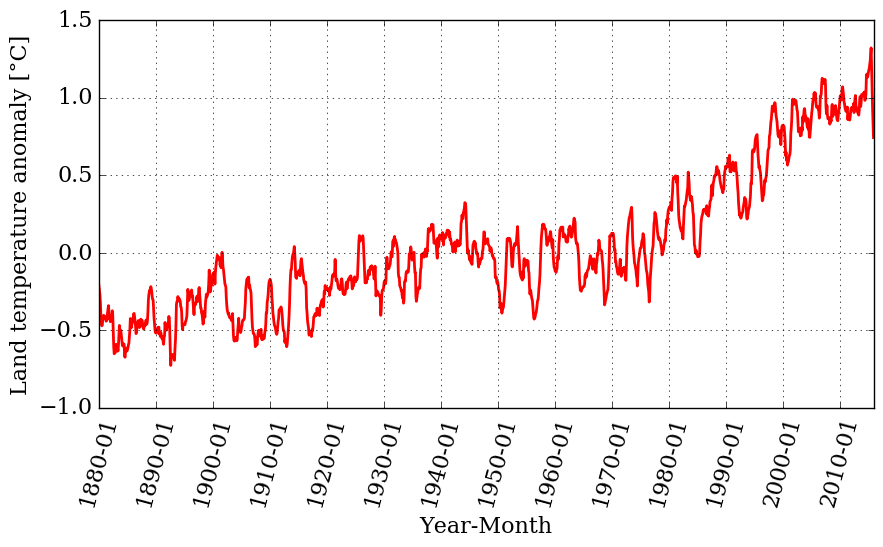

In [32]:
pyplot.figure(figsize=(10, 5))
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, smooth, color='r', linestyle='-', linewidth=2)

pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid(); 

Looking at the plot, we can still see a trend, but the range of values is smaller. Let's plot the original time series together with the smoothed version:

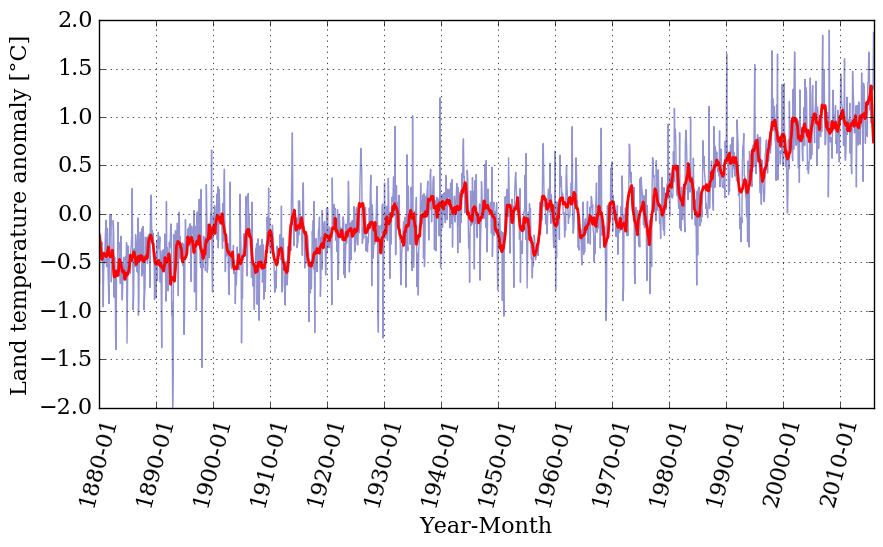

In [33]:
pyplot.figure(figsize=(10, 5))
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, T_land[:,1], color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(dummy, smooth, color='r', linestyle='-', linewidth=2)

pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid(); 


That is interesting! The smoothed data follows the trend nicely but has much less noise. Well, that is what filtering data is all about. 

Let's now fit a straight line through the temperature-anomaly data, to see the trends. We need to perform a least-squares linear regression to find the slope and intercept of a line 

$$y = mx+b$$

that fits our data. Thankfully, Python and NumPy are here to help with the [`polyfit()`](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html) function and the [`poly1d()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html) class. The `polyfit()` function takes three arguments: the two array variables $x$ and $y$, and the order of the polynomial for the fit (in this case, 1 for linear regression). The `poly1d()` class takes an array with the polynomial's coefficient in decreasing power and it gives us back the polynomial itself ready to be used as a function. 


To fit our data we will keep using our `dummy` variable in the abscissa axis. However, if we want to use our linear regression to have an estimate of the temperature anomaly value in a certain year, we need to know which index in the array is the one that correspond to the date we want to give as input. Once we know that index we can evaluate our `dummy` variable in that index and pass that value to the *fitting-function*. 

We call `polyfit()` with our data and we save the coefficients of our linear polynomial into the `tuple` $(m, b)$. Then, we feed `poly1d()` with $(m, b)$ to get our linear regression as a function.   

In [34]:
m, b = numpy.polyfit(dummy, T_land[:,1], 1)

f_linear = numpy.poly1d((m, b)) 

In [35]:
print(f_linear)

 
0.0008322 x - 0.6392


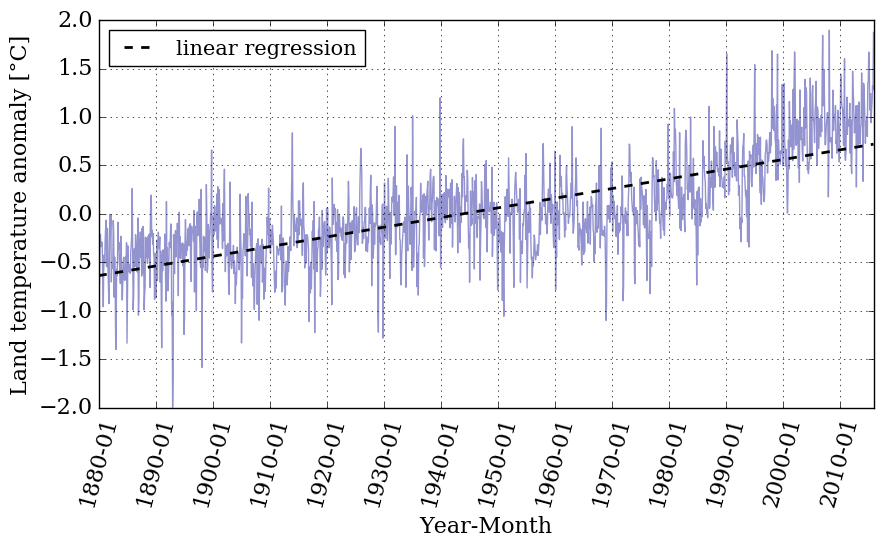

In [36]:
pyplot.figure(figsize=(10, 5))

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, T_land[:,1], color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(dummy, f_linear(dummy), 'k--', linewidth=2,
            label='linear regression')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

If we want to know the value of the land temperature anomaly that our linear regression gives for a certain year we need to know the index in the array that corresponds to the date we want. 
Let's create a function that does that for us, with the help of [`numpy.where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) this task should be easy.

Our `date` array has a specific data type, and we need to take this into account when we use the `numpy.where()` function. Why don't we take a look at the array to refresh our minds.

In [37]:
#Our date array
date

array(['1880-01', '1880-02', '1880-03', ..., '2015-10', '2015-11',
       '2015-12'], dtype='datetime64[M]')

In [38]:
#A specific element of our array
date[23]

numpy.datetime64('1881-12')

With this information in mind we design our function `date_index()` that takes as inputs the array that contains the dates and the desired date, and it'll return the index on the date's array that correspond to the date we want.

**What if we pass a date that is not in the array, or we pass it in the wrong format?**
To prevent this we use [`try and except`](http://www.pythonforbeginners.com/error-handling/python-try-and-except) to help us handle errors in an easy way. 

In [39]:
def date_index(dates_array, date_desired):
    """
    Looks for the index of a specific date in the dates_array.
    
    Arguments:
    ----------
    dates_array  : array,  contains the dates (dtype='datetime64[M]')
    date_desired : str, in the format YYYY-MM we want to know their 
                        index.
    
    Returns:
    --------
    date_index   : array, index in the dates_array that correspond to the
                   desired_date    
    """
    try:    
        date_index = numpy.where(dates_array==numpy.datetime64(date_desired))
    except ValueError:
        raise ValueError('Invalid date entered (bad format)')
        
        
    if len(date_index[0]) > 0:
        return date_index[0][0]
    else:
        raise ValueError("Date not found in date range")
       

If we did things right, then '1880-01' should correspond to index 0, and '2015-12' to 1631.  

In [40]:
idx_first = date_index(date, '1880-01')
idx_last  = date_index(date, '2015-12')
print('The index for 1880-01 is: {} and for 2015-12: {}'.format(idx_first,
                                                                idx_last))

The index for 1880-01 is: 0 and for 2015-12: 1631


If we force our function to fail, it should `raise` the errors we told it to raise. Let's try it!

In [41]:
# Bad format date
date_index(date, '1890-13')

ValueError: Invalid date entered (bad format)

In [42]:
# Date out of range
date_index(date, '1879-01')

ValueError: Date not found in date range

Now we have the beginning and end indices, let's use them to see what our linear regression gives us when we evaluate  specific dates. For example:

In [43]:
year_first = dummy[idx_first]
year_last = dummy[idx_last]

reg_first = f_linear(year_first)
reg_last = f_linear(year_last)

print('Temp anomaly estimation for 1880-01: {}'.format(reg_first))
print('Temp anomaly estimation for 2015-12: {}'.format(reg_last))

Temp anomaly estimation for 1880-01: -0.6383595707557367
Temp anomaly estimation for 2015-12: 0.7189794236969136


Let's compare that to the actual dataset:

In [44]:
print('Temp anomaly data for 1880-01: {}'.format(T_land[idx_first,1]))
print('Temp anomaly data for 2015-12: {}'.format(T_land[idx_last,1]))

Temp anomaly data for 1880-01: -0.1538
Temp anomaly data for 2015-12: 1.8722


It seems like a linear regression might not be the best way of modeling this data, but what if we try doing the regression in "chunks"? 
If we take a look at the plot, we see that around the 1970's the slope starts to be more pronounced. 
Maybe doing a linear regression in two different ranges is a good idea. 
Writing a function to do this is a smart decision so we can reuse it in the future if we want to do more than two regressions.

In [45]:
def regression_range(start_date, end_date, date_array, x, T):
    """
    Perform a linear regression in the range of dates provided.
    
    Arguments:
    ----------
    start_date: str 'YYYY-MM', starting date. 
    end_date: str 'YYYY-MM', ending date.
    date_array: array, it contains the dates in the format 'YYYY-MM'.
    x: dummy array we need in order to plot to plot
    T: temperature anomalies data array.
    
    Returns:
    --------
    x_range: array, range of the x array used to perform the regression.
    T_range: array, range of the T array used to perform the regression.
    f_range: function, linear regression performed on the range provided.
    """
    
    idx_start = date_index(date_array, start_date)
    idx_end = date_index(date_array, end_date)
                
    x_range = x[idx_start: idx_end+1]
    T_range = T[idx_start: idx_end+1]
    
    m, b = numpy.polyfit(x_range, T_range, 1)

    f_range = numpy.poly1d((m,b)) 
    
    return x_range, T_range, f_range
    

Now we call the function in two different ranges, one from `1880-01` to `1969-12` and the other from `1970-01` to `2015-12`:

In [46]:
# First range 
x1, T1, f1 = regression_range('1880-01', '1969-12', date,
                              dummy, T_land[:,1])

In [47]:
# Second range
x2, T2, f2 = regression_range('1970-01', '2015-12', date,
                              dummy, T_land[:,1])

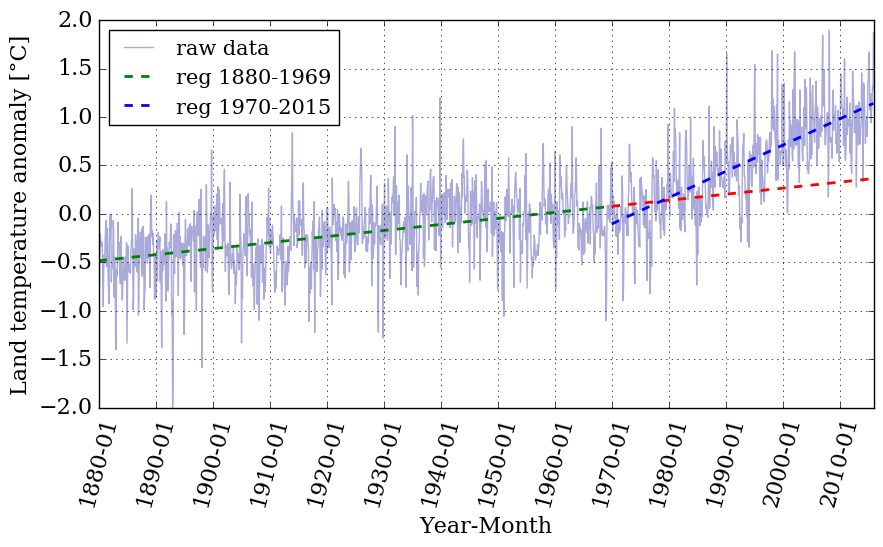

In [48]:
pyplot.figure(figsize=(10, 5))

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, T_land[:,1], color='#2929a3', linestyle='-', linewidth=1,
            alpha=0.4, label = 'raw data')

pyplot.plot(x1, f1(x1), 'g--', linewidth=2, label = 'reg 1880-1969')
pyplot.plot(x2, f1(x2), 'r--', linewidth=2)
pyplot.plot(x2, f2(x2), 'b--', linewidth=2, label = 'reg 1970-2015')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', ncol=1, fontsize=15)
pyplot.grid();

Let's pick a value in the middle of the array and examine the difference between the real data and the prediction made by the linear regression. 

In [49]:
mid_idx1 = date_index(date, '1925-05')
mid_idx2 = date_index(date, '1990-05')
print('The index for 1925-05 is: {} and for 1995-05: {}'.format(mid_idx1,
                                                                mid_idx2))

The index for 1925-05 is: 544 and for 1995-05: 1324


In [50]:
mid_year1 = dummy[mid_idx1]
mid_year2 = dummy[mid_idx2]

mid_reg1 = f1(mid_year1)
mid_reg2 = f2(mid_year2)

print('Temp anomaly estimation for 1925-05: {}'.format(mid_reg1))
print('Temp anomaly estimation for 1990-05: {}'.format(mid_reg2))

Temp anomaly estimation for 1925-05: -0.20146469691379698
Temp anomaly estimation for 1990-05: 0.44674762414762137


In [51]:
print('Temp anomaly data for 1925-05: {}'.format(T_land[mid_idx1,1]))
print('Temp anomaly data for 1990-05: {}'.format(T_land[mid_idx2,1]))

Temp anomaly data for 1925-05: -0.2339
Temp anomaly data for 1990-05: 0.5212


That's certainly better than before. Is it good, though? That's hard to know. 
Later in the course, we'll take a more in-depth look at error analysis and try to answer that question in more detail.

### Dig Deeper:

* You can explore a different data set in the [NOAA](https://www.ncdc.noaa.gov/cag/) webpage and do a similar analysis. 

* A different way of doing linear regressions is by using [`scipy.stats.linregress`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html). Read the documentation and explore the differences with the `numpy.polyfit`. You can also study  which one is faster by using the magic [`%timeit`](https://ipython.org/ipython-doc/3/interactive/magics.html) .

In [52]:
#Ignore this cell, It simply loads a style for the notebook.

from IPython.core.display import HTML
def css_styling():
    try:
        styles = open("../styles/custom.css", "r").read()
        return HTML(styles)
    except:
        pass
css_styling()